# Intro to Scientific Computing

${\bf Midterm Exam}$

NAME:Brian Tong

DATE:March 2, 2016

#Problem 1 -- Earthquakes!

In this problem, we'll work with a data set from the following data source from the USGS:

http://earthquake.usgs.gov/data/centennial/

According to the USGS website, The Centennial Catalog (Engdahl and Villaseñor, 2002) (2.75MB PDF) is a global catalog of locations and magnitudes of instrumentally recorded earthquakes from 1900 to 2008. It is being periodically updated as new arrival time data for recent years become available.

This is a catalog of large earthquakes, created with the purpose of giving a realistic picture of the seismicity distribution in the Earth. It has been assembled by combining existing catalogs, reducing all available magnitudes for each earthquake to a common, corrected magnitude (same magnitudes as List of "Preferred Magnitudes of Selected Significant Earthquakes"-Word file), and relocating the earthquakes with available arrival time data.

For recent years (1964–present) a cut-off magnitude of 5.5 has been chosen for the catalog, and the catalog is complete down to that threshold. For the period prior to 1964 (also referred to as "historical instrumental" or simply "historical" period) the cut-off considered is magnitude 6.5. Between the 1930's and 1963 the catalog is complete to te magnitude 6.5 threshold, but prior to that, the catalog is only complete down to magnitude 7.0.

In order to avoid a repeat of the data-wrangling struggles of Homework Set \#2, I have downloaded the full file and reformatted it into a .csv format. The lines of the file have the following column headers:

date+time stamp, latitude (deg), longitude (deg), Earthquake depth (km), Earthquake Magnitude (Richter)

####The file is available on e-Commons as Earthquake.csv

In [1]:
#first our standard packages
from numpy import *
%matplotlib inline
from matplotlib.pyplot import *

#then the packages we used for the stream flow homework
import dateutil.parser as dparser
from datetime import *
from operator import indexOf

A. Given the following empty lists, populate them with data from the .csv file

In [2]:
#Populate the data into these empty list objects
date = []
latitude = []
longitude = []
depth = []
magnitude = []

#open text file and read the lines
f = open('Earthquakes.csv', 'r')
f.seek(0)
for line in f:
    spl=line.split(',')
    date.append(dparser.parse(spl[0], fuzzy = True))
    latitude.append(spl[2])
    longitude.append(spl[3])
    depth.append(spl[4])
    magnitude.append(spl[-1])
    
#define varibales
date = array(date).astype(datetime)
latitude = array(latitude).astype(float)
longitude = array(longitude).astype(float)
depth = array(depth).astype(float)
magnitude = array(magnitude).astype(float)

B. What was the magnitude of the largest Earthquake recorded on Earth during the 20th Century?

In [3]:
#index 10916 for date is the last date for the 20th Century
temp = magnitude[0]
tempI = 0
for i in range(10917):
    if temp < magnitude[i]:
        temp = magnitude[i]
        tempI = i
        
print "The largest Earthquake recored on Earth during the 20th Century is" , temp, "richter"     

The largest Earthquake recored on Earth during the 20th Century is 9.6 richter


C. When did the largest Earthquake occur?

In [4]:
print "The largest Earthquake occurred on", date[tempI]

The largest Earthquake occurred on 1960-05-22 19:11:00


D. Construct a histogram that shows the frequency of Earthquakes of different magnitudes. The x-axis should run from M=5.5 to M=9.5, the axes should be labeled, and the histogram should contain 40 bins.

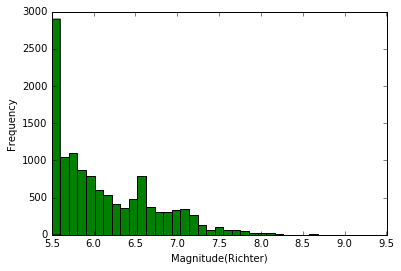

In [5]:
#histogram plot
hist(magnitude, 40, color = 'green', alpha=1)
axis([5.5,9.5,0,3000])
xlabel("Magnitude(Richter)")
ylabel("Frequency")
show()

E. Make a scatter plot of Earthquake magnitude vs. depth. Use transparency for the individual points so that the amount of overlap can be sensed. 

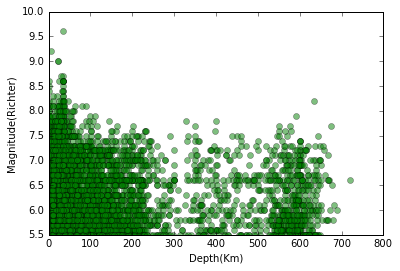

In [6]:
#plot
plot(depth, magnitude, 'go', alpha = .5)
xlabel('Depth(Km)')
ylabel('Magnitude(Richter)')
show()

F. What is the average depth for Earthquakes with magnitude 8 or larger? How does this compare to the median depth of all the Earthquakes in the table?

In [7]:
#find the avearge depth for magnitude 8 or larger
n = 0
tempD = 0
for i in range(len(magnitude)):
    if magnitude[i] >= 8:
        n = n + 1
        tempD = tempD + depth[i]

averageD = tempD/n
print "The average depth,", averageD, "km, compared to the median depth,", median(depth), "km, is a", averageD-median(depth), "km difference."

The average depth, 37.5405405405 km, compared to the median depth, 34.3 km, is a 3.24054054054 km difference.


G. What was the largest length of time between two successive magnitude 8 earthquakes? What was the shortest amount of time between two magnitude 8 earthquakes?

In [8]:
#times for earthquakes with magnitude 8 
tempT = []
for i in range(len(magnitude)):
    if magnitude[i] >= 8: 
        tempT.append(date[i])

#find the difference between each two successive magnitude 8 earthquakes
tempTT = []
for i in range(len(tempT)):
    if i < (len(tempT)-1):
        tempTime = tempT[i+1]-tempT[i]
        tempTT.append(tempTime)
    
print "The largest lenght of time between two successvie magnitude 8 earthquake is", max(tempTT)
print "The shortest lenght of time between two successvie magnitude 8 earthquake is", min(tempTT)

The largest lenght of time between two successvie magnitude 8 earthquake is 2147 days, 4:00:00
The shortest lenght of time between two successvie magnitude 8 earthquake is 0:29:00


H. The following code imports a useful package called basemap, which is a library of mapping methods. If you've given your lists the requested names, this code snippet should run (once the comment characters are removed) and produce a map of the earthquake locations.

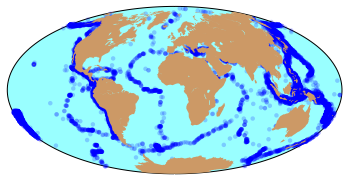

In [9]:
from mpl_toolkits.basemap import Basemap
m = Basemap(projection='hammer',lon_0=0)
x, y = m(longitude,latitude)
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.scatter(x,y,marker='o',alpha=0.2, edgecolor='None')
show()

I. Modify the above block of code to map the distribution of magnitude 6 and larger earthquakes, with earthquake depths shown as point color, and earthquake magnitudes indicated by point size. Add a colorbar to the plot. Center the view from above the International Date Line.

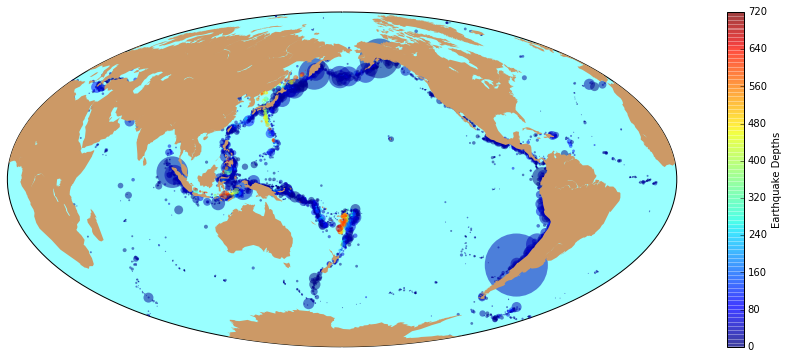

In [10]:
tempLo = []
tempLa = []
tempP = []
tempS = []
tempI = []

#find info for magnitude 6 and larger earthquakes
for i in range(len(magnitude)):
    if magnitude[i] >= 6: 
        tempLo.append(longitude[i])
        tempLa.append(latitude[i])
        tempP.append(depth[i])
        tempS.append(magnitude[i])

#earthquake magnitudes are to close to distinguish so I increase the scale
size=10**(tempS- amin(tempS)) 

#plot
m = Basemap(projection='hammer',lon_0=180)
x, y = m(tempLo,tempLa)
figure(figsize=(18,6))
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.scatter(x,y,marker='o',alpha=0.5, edgecolor='None',c=tempP, s=size)
colorbar(label=r'Earthquake Depths')
show()

#Problem 2: Red Dwarf Falls through the Solar System

For our second problem, construct a simulation of a Red Dwarf passing through the solar system. The simulation should have the following characteristics:

(0) Assume that the 0.1 solar mass Red Dwarf enters the solar system at a distance x=5AU, y=1AU, vx=-15km/s, vy=0km/s relative to the Sun. Assume that the Earth is on its current (assumed circular) orbit around the Sun. Neglect everything else in the solar system

(1) Use the Runge-Kutta integration method with a stepsize of 1 day, and integrate the motion for 10 years.

(2) Modify the "derivs" function to account for the gravitational attractions from both the Sun and the Red Dwarf. The Sun attracts the Red Dwarf and the Earth, and the Red Dwarf attracts the Sun and the Earth. Neglect the Earth's pull on the Sun and the Red Dwarf.

(3) Make a plot (with equal axis ratio) that shows the motion of all three bodies. After 10 years, is the orbital energy of the Earth positive or negative?

In [11]:
au = 1.49e13 #cm
G = 6.67e-8 #cm3 g^-1 s^-2
mSun = 1.989e33 #g
mRDwarf = .1*mSun #g

#first four elements are for the red Dwarf
#second four elements are for the Sun
#last four elements are for the Earth
iCon =array( [                      #Red dwarf
              5*au, #cm
              1*au, #cm
              -15*100000, #cm/s
              0*100000, #cm/s
                                    #Sun
              0, #cm
              0, #cm
              0, #cm/s
              0, #cm/s
                                    #Earth
              1*au, #cm
              0, #cm
              0, #cm/s
              29.8*100000]) #cm/s

t = arange(0, 3.154e7*10+86400 , 86400) #10 years in 1 day intervals

#find velocity and accleration 
def derivs(rv):
#red Dwarf
    x = rv[0]
    y = rv[1]
    vx = rv[2]
    vy = rv[3]

#Sun
    x2 = rv[4]
    y2 = rv[5]
    vx2 = rv[6]
    vy2 = rv[7]
    
#Earth
    x3 = rv[8]
    y3 = rv[9]
    vx3 = rv[10]
    vy3 = rv[11]
    
#set r
    r = sqrt((x-x2)**2 + (y-y2)**2)
    r2 = sqrt((x-x3)**2 + (y-y3)**2)
    r3 = sqrt((x3-x2)**2 + (y3-y2)**2)

#set velocity 
    dxdt = vx
    dydt = vy
    dxdt2 = vx2
    dydt2 = vy2
    dxdt3 = vx3
    dydt3 = vy3
    
#Set accleration
#Both Sun & Red Dwarf
    dvxdt = - (G*mSun / (r)**3) * (x-x2) 
    dvydt = - (G*mSun / (r)**3) * (y-y2)
    
#Sun attracts Red Dwarf & Earth
    dvxdt2 = - (G*mRDwarf / (r)**3) * (x2-x) 
    dvydt2 = - (G*mRDwarf / (r)**3) * (y2-y)
    
#Red Dwarf attract Sun & Earth
    dvxdt3 = - (G*mSun / (r3)**3) * (x3-x2) - (G*mRDwarf / (r2)**3) * (x3-x)
    dvydt3 = - (G*mSun / (r3)**3) * (y3-y2) - (G*mRDwarf / (r2)**3) * (y3-y)

# return v and a
    return( array([dxdt, dydt, dvxdt, dvydt, dxdt2, dydt2, dvxdt2, dvydt2, dxdt3, dydt3, dvxdt3, dvydt3]) )

#Runge-Kutta Integraion
x = [] 
y = []
x2 = [] 
y2 = []
x3 = [] 
y3 = []
vx3 = [] 
vy3 = []
for i in t: 
    k1 = derivs(iCon)
    k2 = derivs(iCon + k1 *(86400/2.))
    k3 = derivs(iCon + k2 *(86400/2.0))
    k4 = derivs(iCon + k3 *(86400))
    xv = iCon + 86400/6.0*(k1 + 2*k2 +2*k3 + k4)
    
    x.append(iCon[0])
    y.append(iCon[1])
    x2.append(iCon[4])
    y2.append(iCon[5])
    x3.append(iCon[8])
    y3.append(iCon[9])
    vx3.append(iCon[10])
    vy3.append(iCon[11])

    iCon=xv

x = array(x)
y = array(y)
x2 = array(x2)
y2 = array(y2)
x3 = array(x3)
y3 = array(y3)
vx3 = array(vx3)
vy3 = array(vy3)

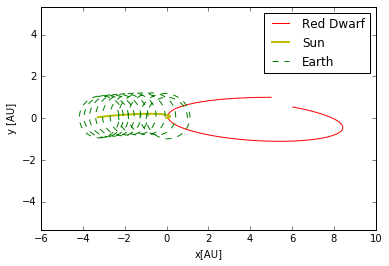

After ten years, the orbital energy of the Earth is 890892731394.0 which is positive.


In [12]:
#plot
plot([i/au for i in x], [i/au for i in y], 'r')
plot([i/au for i in x2], [i/au for i in y2], 'y', lw = 2)
plot([i/au for i in x3], [i/au for i in y3], "g--")
axis('equal')
legend(["Red Dwarf","Sun","Earth"])
xlabel('x[AU]')
ylabel('y [AU]')
show()

#energy 
earthOE = 0.5*(vx3**2 + vy3**2) - G * mSun / sqrt(x3**2 + y3**2)
print "After ten years, the orbital energy of the Earth is", earthOE[-1], "which is positive."